https://www.kaggle.com/residentmario/styling-your-plots/

https://python-graph-gallery.com/3-control-color-of-barplots/

https://www.kaggle.com/residentmario/plotting-with-seaborn

https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
reviews = pd.read_csv('winemag_data.csv')
reviews.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [3]:
basic = reviews['points'].value_counts().sort_index().plot
print basic

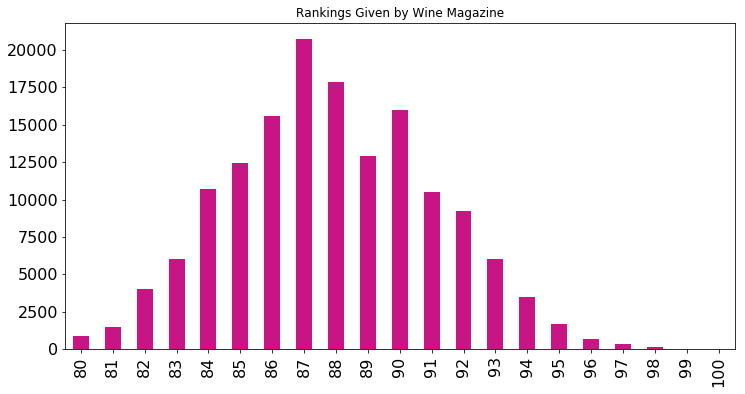

In [4]:
basic.bar(figsize=(12,6),
         color = 'mediumvioletred',
         fontsize = 16,
         title='Rankings Given by Wine Magazine')

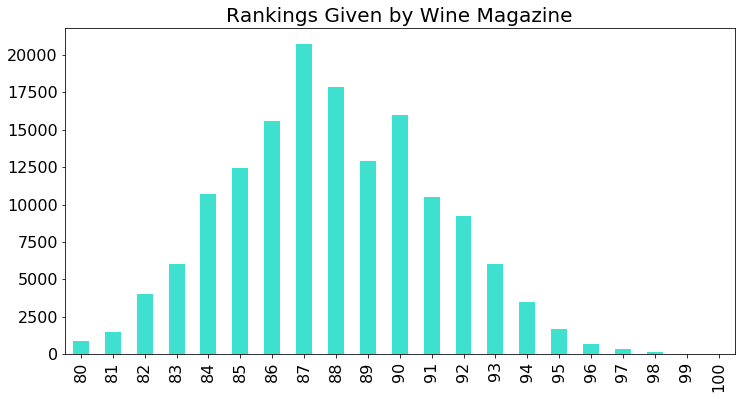

In [5]:
# Title is clearly too small - use matplotlib since pandas is built on mpl
ax = basic.bar(figsize=(12,6),
         color = 'turquoise',
         fontsize = 16)

x = ax.set_title('Rankings Given by Wine Magazine', fontsize=20)

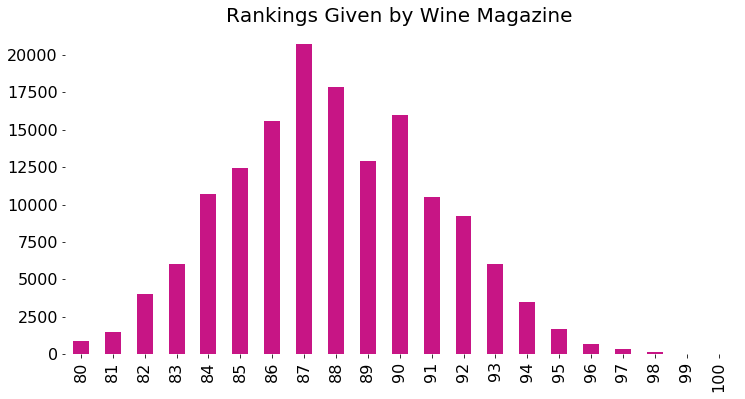

In [6]:
# Get rid of the black box
ax = basic.bar(figsize=(12,6),
         color = 'mediumvioletred',
         fontsize = 16)

ax.set_title('Rankings Given by Wine Magazine', fontsize=20)
sns.despine(bottom=True,left=True)

# Plotting with Seaborn

In [7]:
reviews = pd.read_csv('winemag_data.csv',index_col=0)

In [8]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


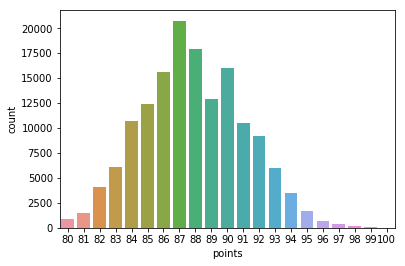

In [9]:
# unlike doing stacked bar charts and lines where we have to give pandas
# aggregated data, countplot does this for you
sns.countplot(reviews['points'])

KDE = kernel density estimate - smooths out data


first look at the line graph - if there's large differences in values, the line chart doesn't really show us the "true" shape of the data

The KDE overcomes this issue. However, it's not good for ordinal cat data because it's expecting to smooth out the data. So for the ratings, it expects there to be 85.5 and 87.5, etc... But those ratings don't exist - not continuous

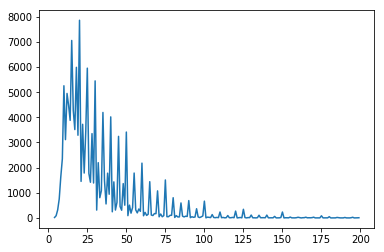

In [10]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

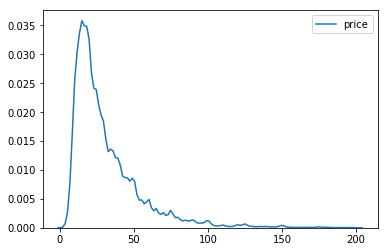

In [11]:
sns.kdeplot(reviews.query('price < 200').price)

/Users/kcclaws/.virtualenvs/analytics/lib/python2.7/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


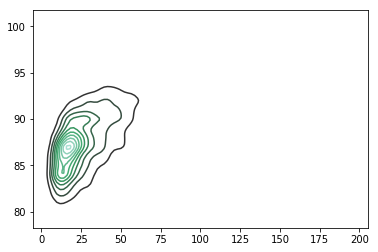

In [12]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:,['price','points']].dropna().sample(5000))

/Users/kcclaws/.virtualenvs/analytics/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


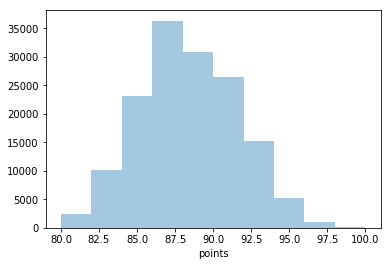

In [13]:
# distplot is equivalent between pandas histogram
sns.distplot(reviews['points'],bins=10,kde=False)

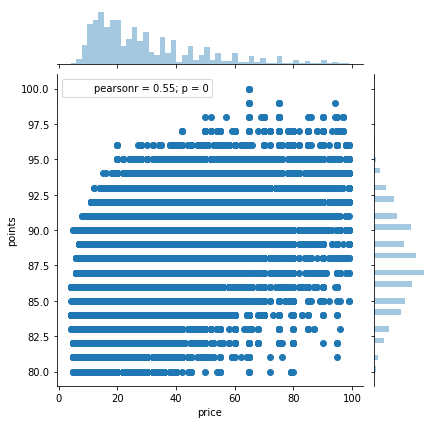

In [14]:
sns.jointplot(x='price',y='points',
             data = reviews[reviews['price'] < 100])

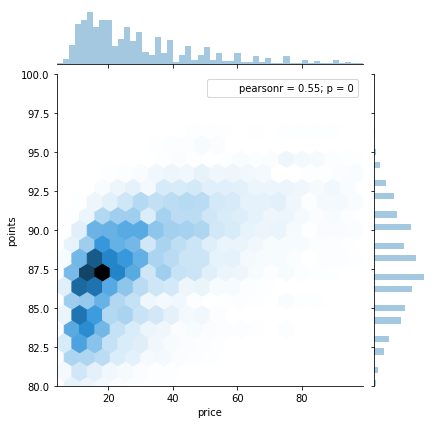

In [15]:
sns.jointplot(x='price',y='points',
             data = reviews[reviews['price'] < 100],
             kind = 'hex',
             gridsize = 20)

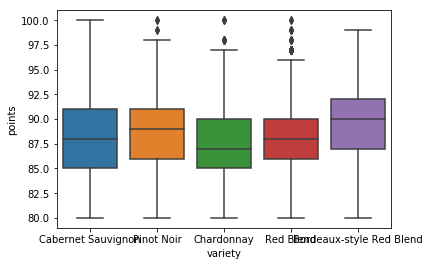

In [16]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index
                    )]

sns.boxplot(
            x = 'variety',
            y = 'points',
            data = df
            )

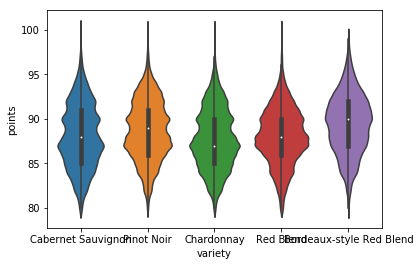

In [17]:
sns.violinplot(
    x = 'variety',
    y = 'points',
    data = reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
            )

In [18]:
reviews.variety.value_counts()[:5]

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

# Subplots 

In [19]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


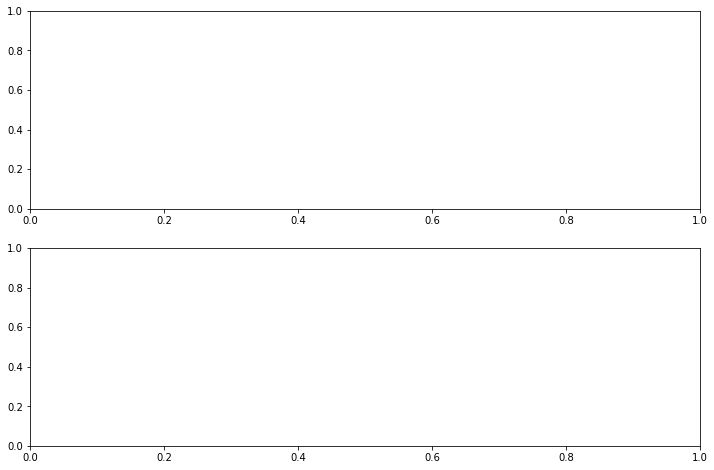

In [20]:
# https://www.kaggle.com/residentmario/subplots/
#subplots returns 2 things - the figure and an array of axes contained
fig,axarr = plt.subplots(2,      #rows
                         1,      # columns
                         figsize=(12,8))

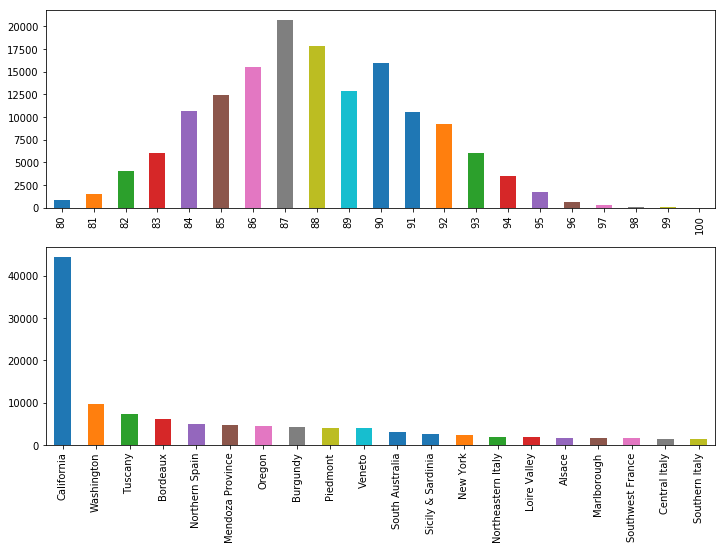

In [21]:
fig,axarr = plt.subplots(2,      #rows
                         1,      # columns
                         figsize=(12,8))
reviews['points'].value_counts().sort_index().plot.bar(
                                                        ax=axarr[0])


reviews['province'].value_counts().head(20).plot.bar(
                                                        ax=axarr[1])

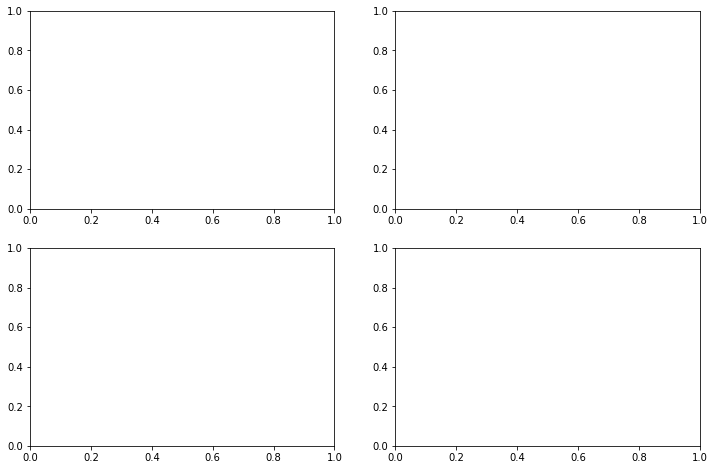

In [22]:
fig,axarr = plt.subplots(2 ,2, figsize = (12,8))

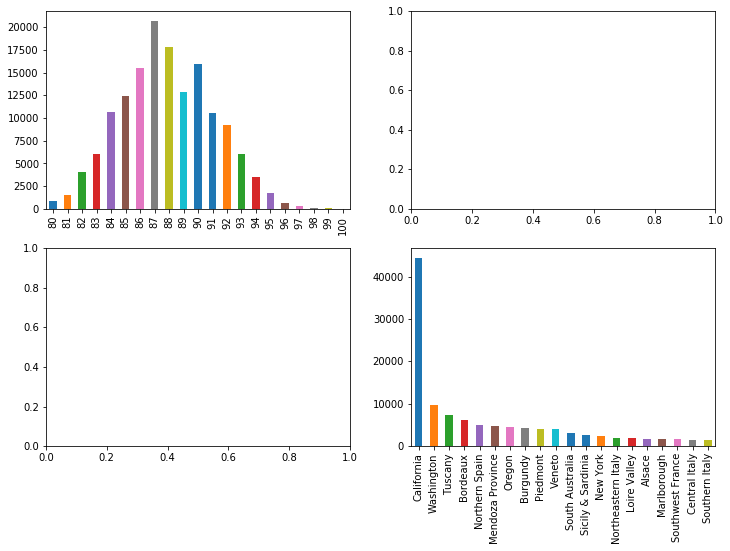

In [23]:
fig,axarr = plt.subplots(2 ,2, figsize = (12,8))

reviews['points'].value_counts().sort_index().plot.bar(
                                                        ax=axarr[0][0]
                                                        )

reviews['province'].value_counts().head(20).plot.bar(
                                                        ax=axarr[1][1]
                                                        )



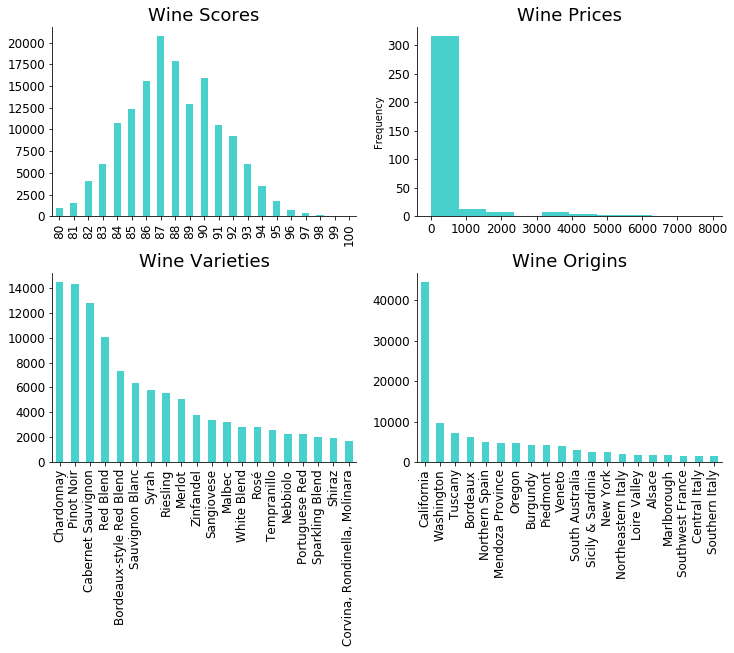

In [33]:
fig,axarr = plt.subplots(2 ,2, figsize = (12,8))

points = reviews['points'].value_counts().sort_index()
variety = reviews['variety'].value_counts().head(20)
province = reviews['province'].value_counts().head(20)
price = reviews['price'].value_counts()

points.plot.bar(ax=axarr[0][0],
                fontsize=12,
               color='mediumturquoise')
axarr[0][0].set_title('Wine Scores', fontsize=18)

variety.plot.bar(ax=axarr[1][0],
                 fontsize=12,
                 color='mediumturquoise')
axarr[1][0].set_title('Wine Varieties',fontsize=18)

price.plot.hist(ax=axarr[0][1],
                fontsize=12,
                color='mediumturquoise')
axarr[0][1].set_title('Wine Prices',fontsize=18)

province.plot.bar(ax=axarr[1][1],
                  fontsize=12,
                  color='mediumturquoise')
axarr[1][1].set_title('Wine Origins',fontsize=18)

plt.subplots_adjust(hspace = 0.3)

sns.despine()


# Faceting with Seaborn